# Credit card default

Variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows', None)

In [4]:
credit_df = pd.read_csv('UCI_Credit_Card.csv')

In [5]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>],
       [<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'PAY_0'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>],
       [<AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>],
  

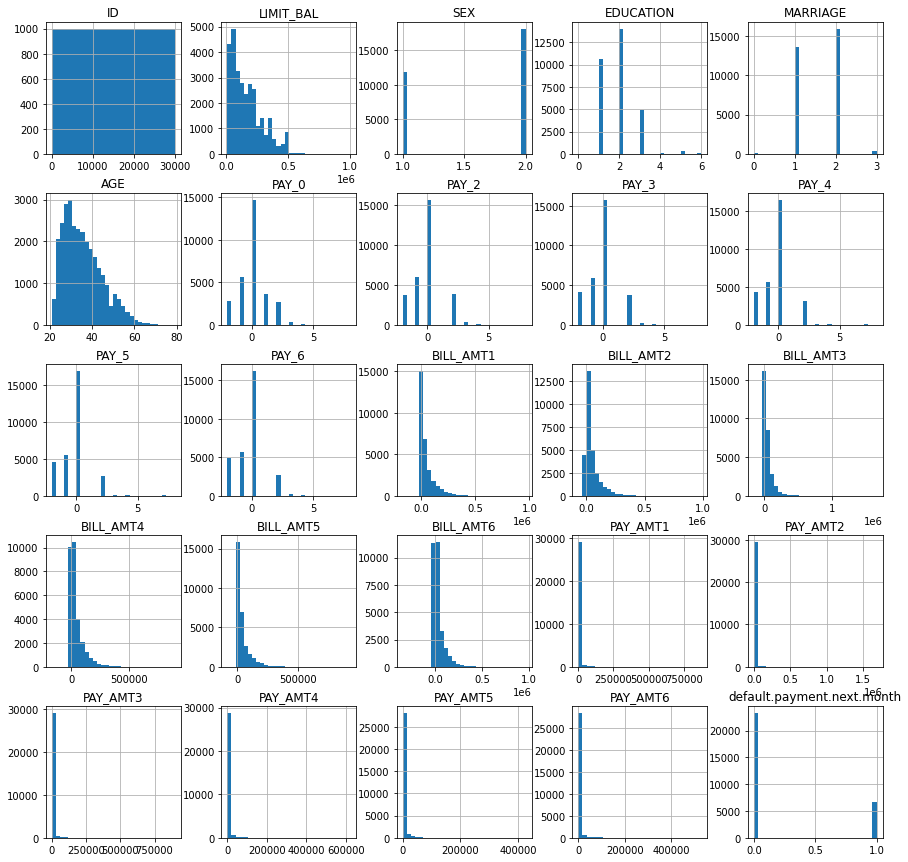

In [6]:
credit_df.hist(bins=30, figsize=(15,15))

<AxesSubplot:>

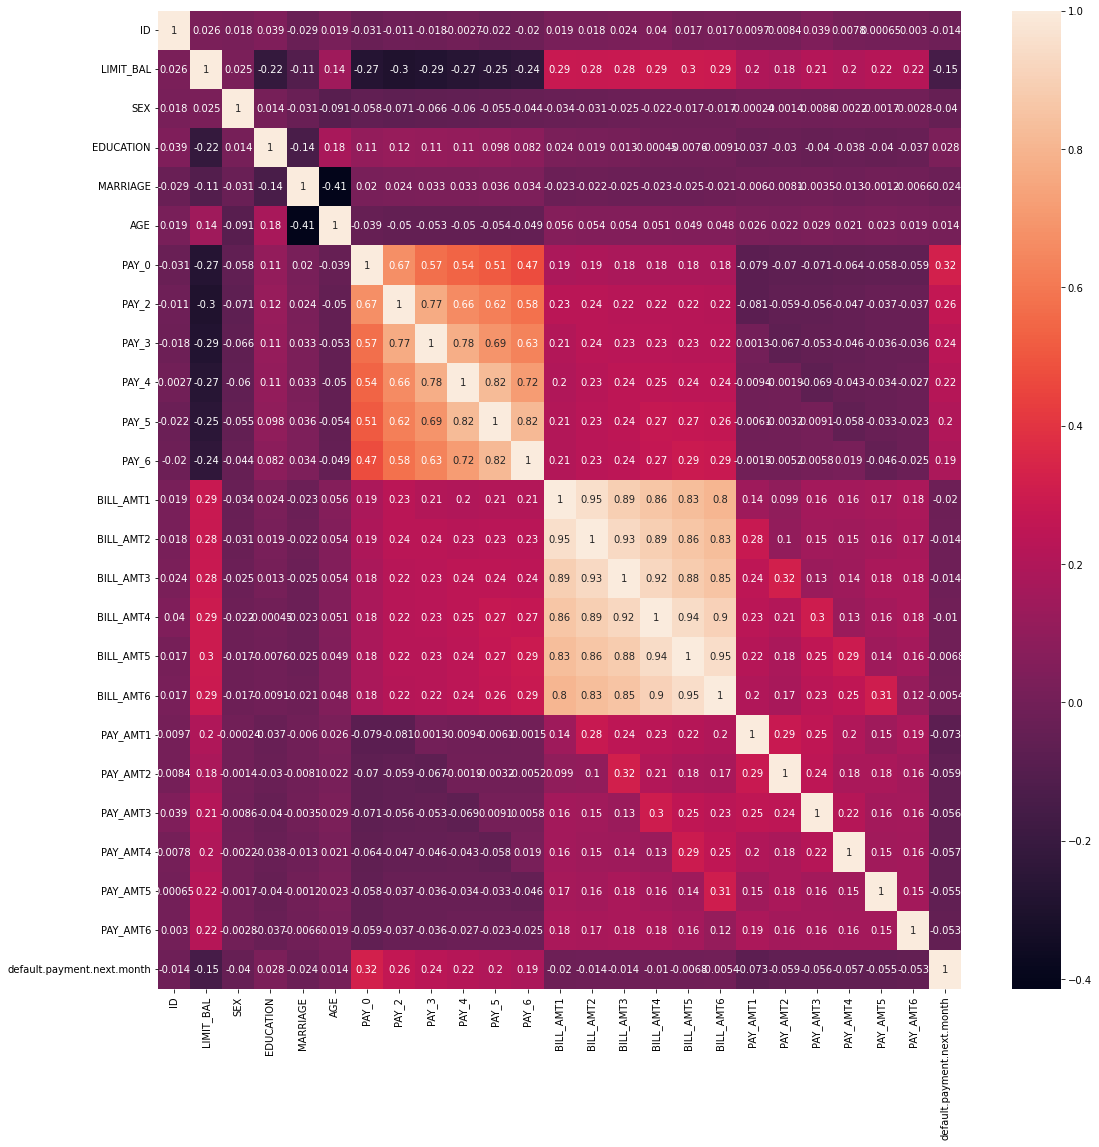

In [7]:
plt.figure(figsize=(18,18))
sns.heatmap(credit_df.corr(), annot=True)

In [8]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

<AxesSubplot:xlabel='BILL_AMT1', ylabel='BILL_AMT2'>

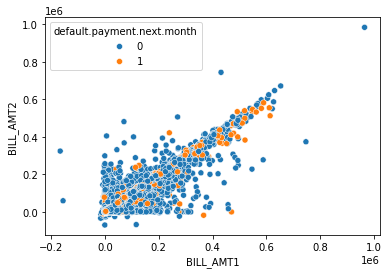

In [9]:
sns.scatterplot(credit_df, x='BILL_AMT1', y='BILL_AMT2', hue='default.payment.next.month')

In [10]:
credit_df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

- 6636 customers defaulted on their credit card payments.
- 23364 did not default on their credit card payments.

([<matplotlib.patches.Wedge at 0x17934b98ca0>,
 [Text(-0.8449152390547128, 0.704356613380692, 'not defaulted'),
  Text(0.9985362305785748, -0.8324214054323276, 'defaulted')])

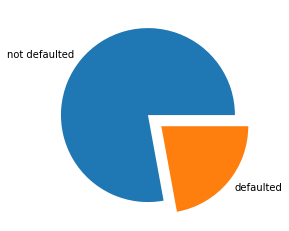

In [11]:
plt.pie(credit_df['default.payment.next.month'].value_counts(),labels=['not defaulted', 'defaulted'], explode=(0,0.2))

In [12]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [13]:
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<AxesSubplot:>

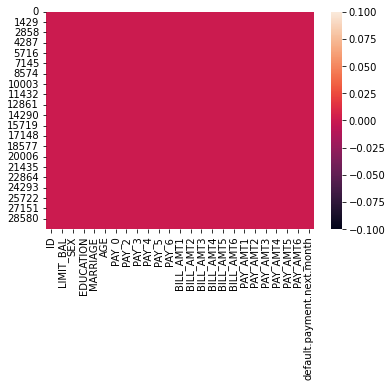

In [14]:
sns.heatmap(credit_df.isnull())

In [15]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Prepare the data for training and testing

In [16]:
x = credit_df.drop(columns=['ID', 'default.payment.next.month','SEX','EDUCATION','MARRIAGE'])
y = credit_df['default.payment.next.month']

In [17]:
x_cat = credit_df[['SEX','EDUCATION','MARRIAGE']]

In [18]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
x_cat= onehotencoder.fit_transform(x_cat).toarray()

In [19]:
credit_df.shape

(30000, 25)

In [20]:
x.shape

(30000, 20)

In [21]:
y.shape

(30000,)

In [22]:
x_cat=pd.DataFrame(x_cat)

In [23]:
x=pd.concat([x,x_cat], axis=1)

In [24]:
x.columns = x.columns.astype(str)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [26]:
x = pd.DataFrame(x)

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=150)

In [28]:
x_train.shape

(21000, 33)

In [29]:
x_test.shape

(9000, 33)

## XG-boost classifier model

In [30]:
import xgboost as xgb

In [31]:
model = xgb.XGBClassifier(objective='binary:logistic', learning_rate= 0.1, max_depth=30, n_estimators=100)

model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
result=model.score(x_test,y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.8126666666666666


<AxesSubplot:>

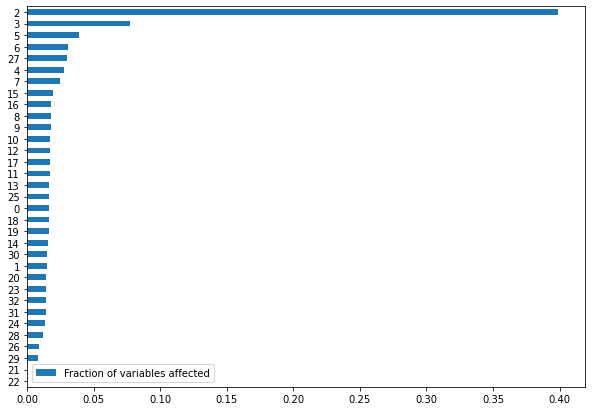

In [33]:
feat_scores=pd.DataFrame({'Fraction of variables affected': model.feature_importances_}, index=x.columns)
feat_scores=feat_scores.sort_values(by = 'Fraction of variables affected')
feat_scores.plot(kind='barh', figsize=(10,7))

In [34]:
y_predict = model.predict(x_test)

<AxesSubplot:>

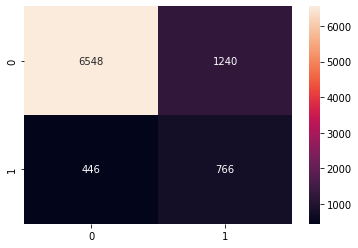

In [35]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd')

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6994
           1       0.63      0.38      0.48      2006

    accuracy                           0.81      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.79      0.81      0.79      9000



## Support vector machine classifier model

In [37]:
x_train.columns

RangeIndex(start=0, stop=33, step=1)

In [38]:
x_train.columns = x_train.columns.astype(str)

In [39]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_svc= LinearSVC(max_iter=10000)
model_svm= CalibratedClassifierCV(model_svc)
model_svm.fit(x_train,y_train)

c:\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The 

CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000))

In [40]:
x_test.columns = x_test.columns.astype(str)

In [41]:
y_predict = model_svm.predict(x_test)

In [42]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6994
           1       0.71      0.24      0.36      2006

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.62      9000
weighted avg       0.79      0.81      0.77      9000



<AxesSubplot:>

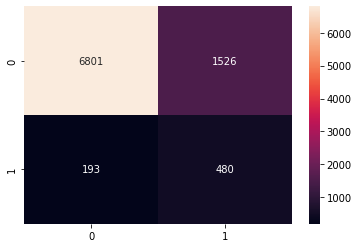

In [43]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd')

## Naive bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

GaussianNB()

In [46]:
y_pred = model_gnb.predict(x_test) 

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.09      0.17      6994
           1       0.23      0.97      0.38      2006

    accuracy                           0.29      9000
   macro avg       0.57      0.53      0.27      9000
weighted avg       0.76      0.29      0.21      9000



<AxesSubplot:>

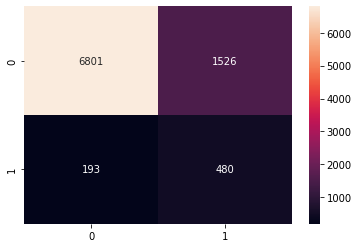

In [48]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd')

## logistic regression model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR=LogisticRegression()

model_LR.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred = model_LR.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6994
           1       0.72      0.23      0.35      2006

    accuracy                           0.81      9000
   macro avg       0.77      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



In [51]:
y_predict = model_LR.predict(x_test)

<AxesSubplot:>

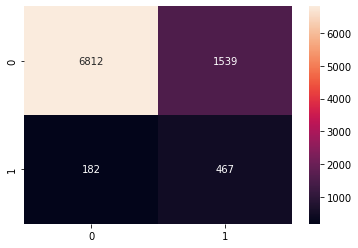

In [52]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd')

## Random Forest classifier model

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
y_pred= model_rf.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6994
           1       0.65      0.38      0.48      2006

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



In [56]:
y_predict = model_rf.predict(x_test)

<AxesSubplot:>

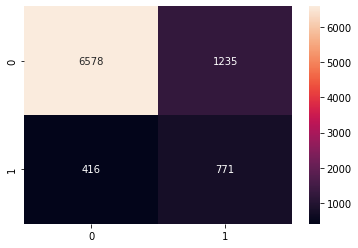

In [57]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd')

## K-Nearest Neighbors classifier model

In [58]:
from sklearn.neighbors import KNeighborsClassifier

model_knn= KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred=model_knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6994
           1       0.55      0.35      0.43      2006

    accuracy                           0.79      9000
   macro avg       0.69      0.63      0.65      9000
weighted avg       0.77      0.79      0.77      9000



In [60]:
y_predict = model_knn.predict(x_test)

<AxesSubplot:>

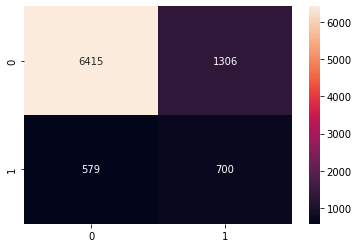

In [61]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd')

## ROC curve

In [62]:
# ROC curve:  residual operating caracteristic curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(x_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(x_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(x_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(x_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(x_test)[:, 1], pos_label = 1)
fpr6, tpr6, thresh6 = roc_curve(y_test, model.predict_proba(x_test)[:, 1], pos_label = 1)

In [63]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(x_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(x_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(x_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(x_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(x_test)[:, 1])
auc_score6 = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

print("Area Under the Curve (AUC):")
print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes
print("XGBoost: ", auc_score6) # XGBoost

Area Under the Curve (AUC):
Logistic Regression:  0.7231944429793262
Support Vector Machine:  0.7224288672444207
Random Forest:  0.7608623229539292
K-Nearest Neighbors:  0.6961010021123362
Naive Bayes:  0.732706227899088
XGBoost:  0.7587727238644376


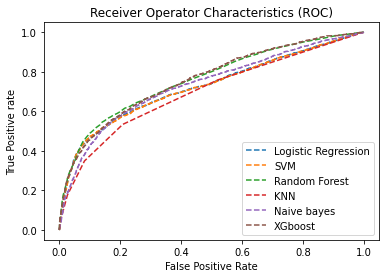

In [64]:
plt.plot(fpr1, tpr1, linestyle = "--", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", label = "Naive bayes")
plt.plot(fpr6, tpr6, linestyle = "--", label = "XGboost")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Using Autogluon

In [65]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [77]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [78]:
x_cat = df[['SEX','EDUCATION','MARRIAGE']]
df = df.drop(columns=['ID','SEX','EDUCATION','MARRIAGE'])
onehotencoder=OneHotEncoder()
x_cat= onehotencoder.fit_transform(x_cat).toarray()
x_cat=pd.DataFrame(x_cat)
df=pd.concat([df,x_cat], axis=1)

In [79]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=0)

In [80]:
x_train

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,0,1,2,3,4,5,6,7,8,9,10,11,12
3225,20000.0,44,0,0,2,0,0,-2,17095.0,19112.0,17980.0,18780.0,0.0,0.0,3000.0,0.0,1000.0,1000.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11815,260000.0,30,-1,-1,-1,-1,-1,-1,165.0,165.0,274.0,165.0,333.0,165.0,165.0,274.0,165.0,333.0,165.0,293.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7338,20000.0,39,2,0,0,0,0,0,20264.0,20328.0,19299.0,19928.0,20204.0,20398.0,1500.0,1500.0,900.0,700.0,1480.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14980,30000.0,23,2,2,2,2,2,2,28224.0,29276.0,28635.0,30127.0,30525.0,29793.0,1800.0,150.0,2250.0,1000.0,0.0,700.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27167,10000.0,29,0,0,0,0,0,0,8275.0,8409.0,8600.0,9470.0,6690.0,9690.0,2800.0,2000.0,1500.0,900.0,3000.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,30000.0,38,0,0,0,0,0,0,26825.0,18401.0,18432.0,17844.0,18237.0,10900.0,2100.0,2500.0,1000.0,1000.0,3000.0,7002.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19648,210000.0,33,0,0,0,0,0,0,199851.0,190551.0,192717.0,195700.0,150525.0,137565.0,7000.0,7791.0,7000.0,5254.0,5400.0,5380.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9845,130000.0,43,0,0,0,0,0,2,74020.0,71527.0,66370.0,43882.0,41063.0,29215.0,5000.0,3000.0,2500.0,4100.0,0.0,5000.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10799,50000.0,29,0,0,0,0,0,0,45561.0,47322.0,49054.0,7378.0,8103.0,8963.0,2500.0,3125.0,417.0,1000.0,1000.0,500.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
predictor = TabularPredictor(label='default.payment.next.month', problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = x_train, time_limit = 500, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20240410_143935"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 500 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels\ag-20240410_143935/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 125s
AutoGluon will save models to "AutogluonModels\ag-20240410_143935/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.0

In [82]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3   0.823917    accuracy       7.641089  235.645361                0.037008          11.672224            3       True         27
1             LightGBM_BAG_L2   0.823875    accuracy       7.580072  212.356017                0.129026           5.373204            2       True         19
2             CatBoost_BAG_L2   0.823542    accuracy       7.475055  218.599933                0.024009          11.617120            2       True         22
3              XGBoost_BAG_L2   0.823417    accuracy       7.595089  213.311122                0.144043           6.328309            2       True         26
4         WeightedEnsemble_L2   0.823208    accuracy       5.268575  148.694199                0.038007           7.827324            2       True  

c:\Python\Python39\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_

In [83]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.823917,accuracy,7.641089,235.645361,0.037008,11.672224,3,True,27
1,LightGBM_BAG_L2,0.823875,accuracy,7.580072,212.356017,0.129026,5.373204,2,True,19
2,CatBoost_BAG_L2,0.823542,accuracy,7.475055,218.599933,0.024009,11.617120,2,True,22
3,XGBoost_BAG_L2,0.823417,accuracy,7.595089,213.311122,0.144043,6.328309,2,True,26
4,WeightedEnsemble_L2,0.823208,accuracy,5.268575,148.694199,0.038007,7.827324,2,True,17
5,NeuralNetFastAI_BAG_L2,0.822875,accuracy,8.131183,249.741446,0.680137,42.758633,2,True,25
6,NeuralNetTorch_r79_BAG_L1,0.822542,accuracy,0.501110,59.658906,0.501110,59.658906,1,True,15
7,LightGBMXT_BAG_L2,0.822458,accuracy,7.612078,211.638856,0.161032,4.656043,2,True,18
8,CatBoost_r177_BAG_L1,0.822167,accuracy,0.024007,14.777086,0.024007,14.777086,1,True,14
9,NeuralNetFastAI_BAG_L1,0.821917,accuracy,0.496102,42.899923,0.496102,42.899923,1,True,10


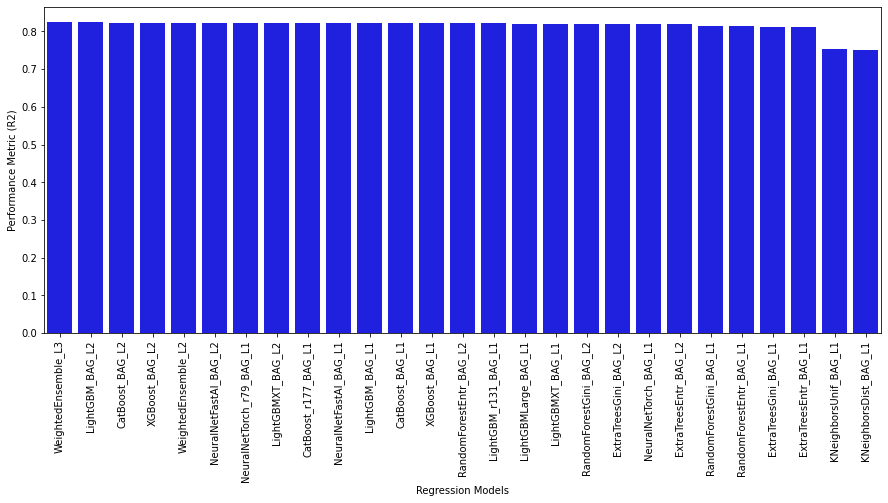

In [84]:
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 90);

In [86]:
y_test = x_test['default.payment.next.month']

In [89]:
fpr7, tpr7, thresh7 = roc_curve(y_test, predictor.predict(x_test), pos_label = 1)

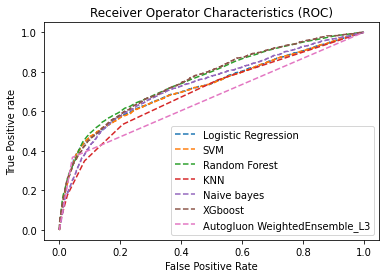

In [93]:
plt.plot(fpr1, tpr1, linestyle = "--", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", label = "Naive bayes")
plt.plot(fpr6, tpr6, linestyle = "--", label = "XGboost")
plt.plot(fpr7, tpr7, linestyle = "--", label = "Autogluon WeightedEnsemble_L3")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()